## 필요한 모듈 불러오기

In [1]:
#!pip install selenium

In [2]:
#!pip install eunjeon

In [3]:
#!pip install konlpy 
import nltk 
from konlpy.tag import Kkma
from konlpy.tag import Twitter
from konlpy.tag import Komoran
from konlpy.tag import Hannanum
from konlpy.tag import Mecab
from selenium import webdriver
from konlpy.corpus import kolaw

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

import requests
import pandas as pd
from bs4 import BeautifulSoup

C:\Users\daro9\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


## 분석한 데이터들을 한번에 담을 리스트

In [4]:
best_store_list = []

## 공공데이터에서 음식점 이름 뽑아오기

In [5]:
df_store = pd.read_csv('서울시 성북구 일반음식점 인허가 정보.csv', sep=',', encoding='CP949')
df_store = df_store[['상세영업상태명', '사업장명']]
df_store = df_store.query('상세영업상태명 == "영업"')
store_list = df_store['사업장명']

In [6]:
store_title = " ".join(store_list)
store_title

"짜앤짬 대성각 청수만남 주식회사 국제 스카이웨이호텔 곰의집 중국관 오야오야 토속집 장충족발 이모네포차 원복집 삼미원 국시집 화원정 옛날중국집 압구정봉구비어 오늘김밥 100년 설렁탕 장위곱창 방이샤브샤브 칼국수 종암점 고려한방삼계탕 맘스터치 동덕여대점 정오네고추장불고기 동화루 대머리식당 참맛감자탕 일락 고우곱창 우리집 전주집 쌍다리식당 별미정 동일기사식당 미락 원조칼국수 꽃샘 서울강촌쌈밥 장위기사식당 工(공)식당 화로상회 한성대점 야야(YAYA) 나팔바지 장충할매왕족발보쌈 참나라바베큐치킨 토크쇼 황제 셰프의돈까스 숭례식당 승리장 마포갈비 대왕유통직영셀프민물장어 청수장 마산미더덕 마동장 영순관 오며가며 투다리 마당쇠호프치킨 마포갈비 피자스쿨 성신여대점 철판남자 서향&아리산 박성춘 남원추어탕 전문점 고대맛집 상만복집 장위동 유성집 고려성 이가한우곱창구이 한울 친구네 오비하우스 할매순대국 고려대점 이천통닭 할매순대국 종로곱창 호수 마마칼국수 갈채 춘천골닭갈비 피엔씨(PNC)푸드 황제곱창 수라간 이야기 성신여대점 남한강 매운탕 베트남노상식당 뚱땡이왕족발 나드리식당 중국관 영빈관 본죽앤비빔밥 돈암점 싸다횟집 국수나무 동덕여대점 장충동족발집 손국수집 한일반점 성북왕족발 서병장대김일병 만리성 아부지가 어부 주당 삼선식당 오바케 돈부리 춘천닭갈비 백암토종순대 이태리총각 식샤 양지식당 송추집 서울돈까스 구식냉삼식당 한마리채 서서갈비 옛날통닭(한성대점) 으뜸식당 아다미분식 양가네손칼국수 배떼기곱창 오백집 한울감자국 구룡포계절회집 사천장 황소식당 성북동참치 금테두른구공탄 투다리(석계역점) 달빛 내마음의 풍차 굴렁쇠 양자설렁탕 페리카나치킨 장원산꽃게 멕시칸바베큐 청목 산촌기사식당 열린호프 로터리감자국 만나식당 치킨주막 핏짜피자 여수집 마산아구찜 장수토종순대국 영산포식당 밤골곱창 무교동낙지.해초나라 중화관 퍼플레인 조마루뼈다귀전문점 송림원 전곱 우리집양념통닭 바니양념통닭 페리카나치킨 보리촌 봉마담쌀롱 멕시카나 월곡점 전통평양만두 아구해물마을 솥뚜껑생삼겹살 만족한식당 산천골양푼이동태요

In [7]:
best_store_list.append(store_title) #총데이터에 추가해주기

## 네이버 VIEW 검색에서 정릉 근처 맛집 Crawling

‘VIEW 검색’은 블로그+카페+포스트+주제별리뷰 검색결과가 통합되어 노출  
다양한 출처의 경험, 의견, 리뷰 콘텐츠 등을 모아 볼 수 있어 사용자들의 생생한 이야기를 들을 수 있습니다.

- '정릉시장맛집' VIEW 검색 Crawling

In [8]:
browser = webdriver.Chrome() #Chromedriver가 없는경우는 다운받아서 파일위치 있는곳에 넣어줄것
browser.get('https://naver.com')
browser.find_element_by_id("query").click()
browser.find_element_by_id("query").send_keys("정릉시장맛집")
browser.find_element_by_class_name("ico_search_submit").click()
browser.find_element_by_link_text("VIEW").click()

import time
SCROLL_PAUSE_SEC = 1

# 스크롤 높이 가져옴
last_height = browser.execute_script("return document.body.scrollHeight")

while True:
    # 끝까지 스크롤 다운
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # 1초 대기
    time.sleep(SCROLL_PAUSE_SEC)

    # 스크롤 다운 후 스크롤 높이 다시 가져옴
    new_height = browser.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

<ipython-input-8-aceaa931bcca>:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_id("query").click()
<ipython-input-8-aceaa931bcca>:4: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_id("query").send_keys("정릉시장맛집")
<ipython-input-8-aceaa931bcca>:5: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  browser.find_element_by_class_name("ico_search_submit").click()
<ipython-input-8-aceaa931bcca>:6: DeprecationWarning: find_element_by_link_text is deprecated. Please use find_element(by=By.LINK_TEXT, value=link_text) instead
  browser.find_element_by_link_text("VIEW").click()


In [9]:
view_1_1 = browser.find_elements_by_css_selector('div.total_area > a') # Crawling한 VIEW 제목
for i in range(len(view_1_1)):
    best_store_list.append(view_1_1[i].text)
    print(i+1, view_1_1[i].text) 

<ipython-input-9-952ee846a89e>:1: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  view_1_1 = browser.find_elements_by_css_selector('div.total_area > a') # Crawling한 VIEW 제목


1 정릉시장 내돈내먹 맛집 모음 (도이칠란드박, 남기남호떡, 슬로카페달팽이, 우리맛곱창, 청수장, 마몽함박...
2 정릉시장 맛집 처음 가본 도이칠란드 박
3 정릉 시장 가성비맛집 양가네칼국수 수제비
4 정릉시장 칼국수, 수제비 맛집 : 양가네 손칼국수 (feat. 정릉시장 핫플)
5 [정릉역맛집] 정릉시장 개존맛 술집 도이칠란드박 (잠봉뵈르 샌드위치, 킬바사 소시지 플래터)
6 정릉시장 족발 맛집, 한방족발 포장 후기
7 파스타펍 정릉시장 맛집으로 추천
8 [정릉시장 쭈꾸미맛집] 정릉쭈꾸미를 소개합니당!
9 배우의 꿈을 접고골목식당 출연한 사장님의 사연
10 정릉시장맛집 홍두깨 손 칼국수 손맛이 장난이 아니여유
11 [솔샘로/ 정릉] 정릉시장에 이런곳이. 킬바사맛집 “도이칠란드박”
12 파스타 맛집/ '파스타펍'/ 정릉 맛집/ 정릉시장 맛집/ 파스타 배달
13 정릉 맛집 ㅣ 정릉시장 중국집 짜장면, 짬뽕, 유린기 맛집 "라이완" 후기
14 [정릉 맛집 / 정릉시장 맛집] 여수 다찌가 생각이 나는 푸짐한 스끼다시가 인상적인 정릉 현지인 추천 맛집...
15 정릉시장 맛집 꿀꿀이생일날(고기존맛집 오늘은 갈매기살이랑 돼지갈비 뿌시기)
16 정릉 아리랑시장의 골목집 - 소한마리탕
17 [정릉] 사이공본가 정릉점 : 가성비 좋은 정릉시장 맛집을 찾는다면
18 [성북구맛집] 재난카드사용가능 맛집랭킹1위 배달가능 리뷰확인
19 성북구맛집 랭킹1위 생방송투데이 먹킷리스트방영 배달가능
20 정릉 맛집
21 [정릉맛집]정릉시장 먹거리곱창 추천
22 정릉시장 수제 샤퀴테리맛집 도이칠란드박
23 서울 잠봉뵈르 맛집 , 정릉시장 도이칠란드박 내돈내산 수제 킬바사소세지도 존맛탱
24 골목식당 나온 정릉 아리랑시장 맛집, 장수식당
25 [정릉] 아리랑시장 숨은 해장국 맛집 '골목집'
26 정릉천변 맛집 ～ 정릉 시장 58년 전통 기차 순댓국
27 정릉시장 맛집 총정리 광고 아님
28 성북구 정릉 맛집 시장 고기식당 꿀꿀이생일날
29 [정릉 맛집] 정릉시장맛집 나 고깃집이야 다녀왔어요


In [10]:
view_1_2 = browser.find_elements_by_css_selector('div.total_dsc_wrap > a') #Crawling한 VIEW 미리보기
for i in range(len(view_1_2)):
    best_store_list.append(view_1_2[i].text)
    print(i+1, view_1_2[i].text) 

1 정릉시장 맛집모음 안녕하세요 혀나짱입니다 ◡̈ ! 정릉동으로 이사를 온지도 반년 정도가 되었네요. 오고... 골목식당 , 함박 메뉴 단 두개 ! 둘 다 너무 너무 맛있음... 음식 점수 : ★★★★★ 6. 황궁 위치 : 정릉시장 내...
2 요즘 정릉시장 맛집으로 급부상하고 있다는 도이칠란드 박입니다. 자주 방문하는 곳이 아니다 보니 친구가 알려줘서 알았네요. 정릉시장 쪽 골목 끝쯤에 위치해있었습니다. 앞에 사람들이 많아서 눈에 바로 띄었어요....
3 양가네 손칼국수인데 안에 손님도 많더라구요~ 정릉시장 맛집 같아보였어요. 무엇보다 .. 나이 드신분들이... 양가네손칼국수 #정릉시장가성비맛집 #정릉시장수제비 #정릉가성비식당 성북구 솔샘로6길 59 02-911-0322 ***-****-****
4 오늘은 점심으로 칼국수가 너무 땡기더라구요~ 그래서 찾게된 성북구 정릉시장의 맛집인 양가네 손칼국수를... 즐겨요~~ #서울맛집 #정릉시장맛집 #정릉맛집 #정릉혼밥 #성북구맛집 #성북구혼밥 #양가네손칼국수 #칼국수...
5

<ipython-input-10-aec23edb44d5>:1: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  view_1_2 = browser.find_elements_by_css_selector('div.total_dsc_wrap > a') #Crawling한 VIEW 미리보기


 2 개나 주셔서 내가 다 썼다. 담요 정말 두껍고 따뜻함 ㅠㅋㅋㅋㅋㅋㅋ 덕분에 잘 즐기다 갔어요 아디오스~! #정릉역맛집 #정릉역술집 #정릉시장술집 #정릉시장맛집 #독일음식 #독일소시지 #소시지플래터 #잠봉뵈르샌드위치
6 ㅋㅋㅋ 정릉 시장 한방족발! 아주 대대대대대 만족입니다! 재방문 의사 100% 200% 라 다음에는 저희 동네에서 배달 시켜 먹어보거나 족발 나오는 시간에 맞춰서 포장하러 가볼거에요! 정말 많은 것 같은데 정작...
7 정릉시장에서 처음 등장했던 파스타집인데 오픈 초반부터 몇 년째 단골로 찾아가는 곳 입니다! 경기도로 이사갔지만 파스타가 먹고 싶으면 여기까지 종종 찾아가는 나는야 찐단골! 저번에 방문할때는 홀 메뉴가...
8 정릉시장 쭈꾸미맛집 정릉쭈꾸미 상견례선물 픽업하러 갓다가 근처에서 저녁먹으려고 보다가 갑자기 쭈꾸미가 땡겨서 근처에 눈에 보이는 가게로 들어갓는데ㅎㅎ 와 완전 제입맛에 딱맞앗어요ㅎㅎ 메뉴는 철판쭈꾸미...
9 현재 솔루션이 진행되고 있는<백종원의 골목식당> 정릉 아리랑시장 편 그중 화려한 과거(?)를 가진수제함박집 사장님이 있었는데요..★ 연극배우 출신 어머니와뮤지컬 배우를 꿈꾸던 아들 게다가 어머니의...
10 어느 식당을 가나 다 국내산 이더라도 고추가루만은 거의 다 중국산을 쓰시더군요. 뭐.. 국내산 중국산... 정릉시장 칼국수 맛집은 홍두깨 손칼국수집의 얼큰 칼국수다라고.. 저는 그렇다고 나마 그럴 수도 있겠지만 이...
11 최근 정릉시장내 맛집으로 급부상한 #정릉시장맛집 #정리단길 #잠봉뵈르 #수제소세지맛집 #코젤맥주맛집 #도이칠란드박 3월 1일 부터 정식오픈 두명의 젊은 사장님들이 운영하는 곳 친구사이인 사장님 두분은 어려운...
12 안녕하세요 여러부운 오랜만에 맛집 포스팅이네요. ㅇ ㅏ...일단 포스팅 자체가 굉장히 오랜만이쥬? 히히.....타니 나 자신 반성해... 제가 사는 서울 성북구 정릉에 정릉시장이 있는데 여기에 굉장히 맛있는 파스타집이...
13 날짜 2022년 4월 5일 날씨 맑음 제목 정릉

73 정릉시장맛집 도이칠란드 박 소세지스토어에서 코젤 한잔 오랜만에 정릉시장에 다녀왔는데 세상에 엄청... 당하고 정릉시장에 소세지가게? 펍인???? 맛집분위기가 물씬 느껴져서 눈에 띄어 바로 들어갔어요~~ 우선, 킬바사...
74 소중한 선배와의 약속이 있던 오늘 건강한 밥집을 가기로 했다~~ 정릉시장 두리맛횟집 2층에 자리한 #윈디!!... 다음엔 우렁쌈밥을 먹어보기로 했다ㅎㅎ #정릉맛집 # #정릉쌈밥 #정릉소불고기
75 제ㅇ분식 정릉 숭ㄷ분식 등등에 인터넷에선 미미ㄴ랑 홍가ㄴ랑 전국떡볶이시리즈 (부림시장 내당시장 통인시장 신천할매등등) 여러가지 시판 떡볶이는 많이 주문해다 먹긴 했는데 다른분들의 떡볶이 맛집 정보도...
76 저희는 시작을 북한산보국문역 근처의 돈까스맛집 돈까스캠프로 결정했었어요~ 먼가 와인같은것도 많고... 따라 정릉시장까지 가기로 합니다~~ 정릉천은 서울에 있는 하천인데~~ 청계천이나 중랑천과는 다르게 정말...
77 내돈내산 후기입니다요- 정릉초밥맛집 초밥 사진 ㄱㄱ 아늑한 정릉시장 맛집 강동수초밥 초밥맛집 따란~ 제가 시킨건 아마 B초밥 세트 였을 겁니다! 후훗 먹음직스러운 비주얼이죠! 강동수초밥은 정릉시장 근처에 있어염...
78 안녕하세요~~ 오늘은 정릉동 정릉시장에 위치한 순대국 맛집 기차순대국 소개드려요! 위치 및 자세한 정보는 아래 링크로 가시면 확인 가능합니다 : ) http://naver.me/x1e0Jhpa 음식점 사진 및 제가 먹은 순대국 동영상 공유...
79 #정릉시장맛집 #정릉시장함박스텍맛집 #정릉시장마몽함박 #골목식당정릉시장마몽함박 #정릉시장마몽함박맛집 날씨가 제법 쌀쌀합니다. 여름철 내내 바쁘다보니 맛집을 방문할 기회가 없었네요. 오늘은 정릉동 현장...
80 은호식당(090518/191216) : 남대문시장내 / 02-753-3263 / 꼬리곰탕전문(70년 전통) 68) 삼오쭈꾸미... 독립문맛집(191129) : 서대문구 영천시장길 50(옥천동) / 02-362-5659, ***-****-**** / 속

- '정릉맛집' VIEW 검색 Crawling

In [11]:
browser = webdriver.Chrome() #Chromedriver가 없는경우는 다운받아서 파일위치 있는곳에 넣어줄것
browser.get('https://naver.com')
browser.find_element_by_id("query").click()
browser.find_element_by_id("query").send_keys("정릉맛집")
browser.find_element_by_class_name("ico_search_submit").click()
browser.find_element_by_link_text("VIEW").click()

import time
SCROLL_PAUSE_SEC = 1

# 스크롤 높이 가져옴
last_height = browser.execute_script("return document.body.scrollHeight")

while True:
    # 끝까지 스크롤 다운
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # 1초 대기
    time.sleep(SCROLL_PAUSE_SEC)

    # 스크롤 다운 후 스크롤 높이 다시 가져옴
    new_height = browser.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

<ipython-input-11-0b786a9161eb>:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_id("query").click()
<ipython-input-11-0b786a9161eb>:4: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_id("query").send_keys("정릉맛집")
<ipython-input-11-0b786a9161eb>:5: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  browser.find_element_by_class_name("ico_search_submit").click()
<ipython-input-11-0b786a9161eb>:6: DeprecationWarning: find_element_by_link_text is deprecated. Please use find_element(by=By.LINK_TEXT, value=link_text) instead
  browser.find_element_by_link_text("VIEW").click()


In [12]:
view_1_3 = browser.find_elements_by_css_selector('div.total_area > a') # Crawling한 VIEW 제목
for i in range(len(view_1_3)):
    best_store_list.append(view_1_3[i].text)
    print(i+1, view_1_3[i].text) 

<ipython-input-12-e3cb9448bf24>:1: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  view_1_3 = browser.find_elements_by_css_selector('div.total_area > a') # Crawling한 VIEW 제목


1 정릉시장 내돈내먹 맛집 모음 (도이칠란드박, 남기남호떡, 슬로카페달팽이, 우리맛곱창, 청수장, 마몽함박...
2 청국장 맛집 정릉역 장수식당 골목식당 청국장집 점심
3 원할머니보쌈 도시락 추천 짱맛나는 정릉 맛집
4 가성비 좋은 정릉맛집, 정릉초밥 @강동수초밥
5 정릉맛집 한라산도새기 제주 흑돼지 전문점, 서울 도심 속 여유로운 캠핑 피크닉 감성으로 야외 바베큐 즐기기
6 정릉시장 칼국수, 수제비 맛집 : 양가네 손칼국수 (feat. 정릉시장 핫플)
7 [정릉맛집] 갈비와 냉면이 존맛탱 청수장
8 [정릉 맛집]드시소, 북한산보국문역 앞 보물같은 이자카야
9 정릉맛집 바람난오리궁뎅이 오리불고기 추천해요
10 정릉 맛집 기차순대국 두부 순대 너무 특이해
11 220106_도이칠란드 박 :: 정릉 맛집
12 삼성동 맛집 점심 기깔나게 먹었던 칼국수 추천, 정릉 근처니까 빨리 가보자
13 정릉 맛집 : 달밝은집
14 정릉 맛집 강동수초밥 가성비 좋은 초밥집 ♪
15 정릉맛집 원할머니보쌈 도시락 그리고 의성마늘떡보쌈
16 내가가본 정릉 맛집 중 넘버원!
17 성북구의 분위기 좋은 핫플레이스 5
18 [정릉맛집] 동네찐맛집 "불타는돼지" (오겹살,목살,갈비)
19 정릉맛집, 정릉곱창맛집 l 야한곱창 정릉점
20 정릉 카페 테레 분위기 좋은 테라스 + 크로플 맛집
21 성북구맛집 / 정릉맛집 초밥이 싱싱하고 맛있는 국민대맛집 강동수초밥
22 정릉역 카페 샌드위치 맛집 읍천리382
23 [정릉맛집추천] 베트남 쌀국수, 딤섬, 사이공 봉, 해물볶음밥 요리 맛보기
24 서경대 근처에 위치한 정릉 족발 맛집 다원족발
25 원할머니보쌈 당연히 맛있는 정릉맛집 도시락이라 저녁메뉴 추천으로 딱
26 한라산도새기 : 정릉,성신여대 가성비 제주 흑돼지 맛집, 맛잘알 이영자님이 가신 곳이면 무조건 가야쥬~!
27 '포도집' 정릉 맛집 카페라는 소문의 진실
28 정릉 맛집 : 정릉 골목식당 맛집 '마몽함박' 다녀왔습니다.[내돈내산, 북한산보국문역맛집, 정릉양식]
29 정릉 맛집
30 [정

In [13]:
view_1_4 = browser.find_elements_by_css_selector('div.total_dsc_wrap > a') #Crawling한 VIEW 미리보기
for i in range(len(view_1_4)):
    best_store_list.append(view_1_4[i].text)
    print(i+1, view_1_4[i].text) 

1 정릉시장 맛집모음 안녕하세요 혀나짱입니다 ◡̈ ! 정릉동으로 이사를 온지도 반년 정도가 되었네요. 오고 나서 두달 정도 열심히 근처 맛집들을 다녔는데.. 당시에도 이미 임신 말기였기 때문에 그 후엔 출산으로 다니지...
2 #정릉아리랑시장 #장수식당 #골목식당정릉청국장집 #정릉장수식당 #장수식당메뉴 #고기청국장 #장수식당영업시간 #멸치청국장 #정릉청국장맛집 #정릉맛집 #보리밥 #프로바이오틱스 #펩타이드 #고혈압 #정릉점심...
3

<ipython-input-13-32b52b5145f7>:1: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  view_1_4 = browser.find_elements_by_css_selector('div.total_dsc_wrap > a') #Crawling한 VIEW 미리보기


 정릉 맛집 추천 원할머니보쌈 도시락 역시 보쌈의 원조 원할머니보쌈족발! 보쌈과 도시락을 동시에 즐겼는데... 내가 다녀온 정릉점은 11시부터 23시까지 영업! 픽업의 경우 미리 전화 주문하고 찾으러 오면 음식이 식지...
4 강동수초밥 #정릉맛집 #국민대맛집 #정릉초밥 전화 02-943-3493 주소 서울특별시 성북구 솔샘로4길 12-1 강동수초밥 영업시간 11:30-21:00 (브레이크타임 14:30-17:00) 집이랑 국민대가 가까운데, 가성비 좋은 초밥맛집이 있다고...
5 오늘 제가 소개해 드릴 곳은 정릉맛집으로 이미 개그맨 이영자님이 진작에 방문하여 맛집으로 인정한 #한라산도새기 정릉점입니다. 예쁜 하얀색 벽돌로 지어진 2층 집은 한라산도새기 고깃집과 커피팔다(PALDA) 카페가 함께...
6 오늘도 읽어주셔서 감사하고, 날이 좋던데 다들 해피 일요일 되세요 ㅎㅅㅎ 3월의 마지막 주말을 즐겨요~~ #서울맛집 #정릉시장맛집 #정릉맛집 #정릉혼밥 #성북구맛집 #성북구혼밥 #양가네손칼국수 #칼국수 #수제비 #칼제비...
7 #청수장 #갈비맛집 #정릉맛집 #성북구맛집 안녕하세요. 시니이니네 엄마에요. 오늘 소개드릴 맛집은요. 청수장이에요. 여긴 오랜 전통이 있는 곳인데, 정릉은 맛집이 많은거 다들 아시죠? 갈비와 냉면을 드시러 오십시오....
8 위치한 정릉의 이자카야 드시소 입니다 번동과 정릉 이렇게 두군데가 있는데 저희집에서 좀 더 가까운... 근처에 위치해있고 북한산보국문역 바로 앞에 있어 접근성도 좋아요! 성북러가 강추하는 드시소였습니다!!
9 제가 오리불고기를 워낙 좋아하는데 사실 수도권은 오리훈제집은 많은데 오리불고기 집은 많이 없는거같아요ㅠ 그러던중 발견한 정릉맛집 바람난오리궁뎅이 식당을 찾게됫어요. 집에서 까지 꽤 멀지만 남편과 같이...
10 보니 #정릉맛집 찾게 되더라고요~ 우연히 검색하게 된 #기차순대국 어머어머~~ 순대 안에 두부가 있는 정말 특이한 순대국이라 여긴 꼭 가봐야 겠다며.. 너무 궁금하더라고요~~~ 그래서 가봤어요~~ 여기

70 휴무 #정릉봉화묵집 #봉화묵집 #정릉맛집 #정릉묵집 #정릉국수맛집 #정릉칼국수맛집 #정릉만두맛집 #정릉손만두맛집 #정릉밥집 #정릉메밀묵맛집 #아리랑시장맛집 #성북구맛집 #메밀묵맛집 #묵밥맛집 #묵사발맛집...
71 * 참복코스/대게한마리 두 메뉴는 예약메뉴로 따로 진행한다고 하시더라고요! 참고 #내돈내산 #드시소 #정릉맛집 #이자카야맛집 #일식맛집 #수유맛집 #북한산보국문역맛집 #맛술집
72 찾다가 정릉시장 맛집 라이완이라는 곳을 알게되어서 바로 방문을 했답니다. 정릉맛집 라이완은 정릉시장 골목안쪽에 위치해있으며, 시장 안 신협 바로 옆골목이기에 찾기는 수월할꺼 같답니다. 시장 특성상 주차는...
73 날짜 2022년 4월 5일 날씨 맑음 제목 정릉시장 중식당 맛집 "라이완"다녀온날 안녕하세요:) º갓지º 입니다 ♡ ▷ 정릉 ㅣ 정릉시장 중국집 짜장면. 짬뽕 . 유린기 . 양장피 <라이완> 후기 라이완 º 주소 : 서울 성북구...
74 날씨도 좋고 분위기도 좋고~ 고기도 맛있게 즐겨서 좋았던 날 :) 다음에 야외 바베큐장 오픈하면 다시 가봐야겠어요 >_< #한라산도새기 #정릉맛집 #성신여대맛집 #성북구맛집 #돈암동맛집 #정릉카페 #성신여대카페 제품을...
75 24시간 OPEN 무인 정릉맛집 김준호대단한갈비 정릉점 찾아보세요 #김준호의대단한갈비정릉점 #정릉길음 #밀키트전문점 #정릉길음갈비 #홈파티 #캠핑필수품 #캠핑음식 #무인매장 # #정릉동맛집
76 정릉시장에 있는 수제소시지 전문점 #도이칠란드박 은 지난 여름에 남편과 처음 가봤는데요 정말 이런곳에 음식점이 있을까 싶을 정도로 #정릉시장 에서도 안쪽에 주택가에 있어요~ 분위기도 너무 힙하고 좋은데 이런...
77 근처에 지나가시다가 시장하실 일이 있으시면 한번 들려 보시는건 어떻까요!? 심당이었습니다 #정릉아리랑시장 #정릉시장 #정릉맛집 #숨은맛집 #정릉동 #서이추 #일상 #국밥 #소한마리탕 #국밥충 #소국밥 #도가니탕 #해장국
78 - 야장테이블에는 벨이 없으므로, 매장에 가셔서 주문해야하는 단점이

- '국민대맛집' VIEW 검색 Crawling

In [14]:
browser = webdriver.Chrome() #Chromedriver가 없는경우는 다운받아서 파일위치 있는곳에 넣어줄것
browser.get('https://naver.com')
browser.find_element_by_id("query").click()
browser.find_element_by_id("query").send_keys("국민대맛집")
browser.find_element_by_class_name("ico_search_submit").click()
browser.find_element_by_link_text("VIEW").click()

import time
SCROLL_PAUSE_SEC = 1

# 스크롤 높이 가져옴
last_height = browser.execute_script("return document.body.scrollHeight")

while True:
    # 끝까지 스크롤 다운
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # 1초 대기
    time.sleep(SCROLL_PAUSE_SEC)

    # 스크롤 다운 후 스크롤 높이 다시 가져옴
    new_height = browser.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

<ipython-input-14-757bd4966030>:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_id("query").click()
<ipython-input-14-757bd4966030>:4: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_id("query").send_keys("국민대맛집")
<ipython-input-14-757bd4966030>:5: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  browser.find_element_by_class_name("ico_search_submit").click()
<ipython-input-14-757bd4966030>:6: DeprecationWarning: find_element_by_link_text is deprecated. Please use find_element(by=By.LINK_TEXT, value=link_text) instead
  browser.find_element_by_link_text("VIEW").click()


In [15]:
view_1_5 = browser.find_elements_by_css_selector('div.total_area > a') # Crawling한 VIEW 제목
for i in range(len(view_1_5)):
    best_store_list.append(view_1_5[i].text)
    print(i+1, view_1_5[i].text) 

<ipython-input-15-91667ec78462>:1: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  view_1_5 = browser.find_elements_by_css_selector('div.total_area > a') # Crawling한 VIEW 제목


1 [정릉맛집 / 국민대맛집] 밥이 맛있는 정릉초밥 맛집 강동수초밥_2021.10.12
2 정릉 맛집 국민대 근처 정릉회관 진짜 조온맛 솔직후기
3 성북구맛집 / 정릉맛집 초밥이 싱싱하고 맛있는 국민대맛집 강동수초밥
4 정릉_국민대 맛집 골목식당 마몽함박_카페그리다
5 국민대 근처 맛집 잘 아시는 분 계세요?
6 정릉 초밥 맛집 국민대 초밥 분위기 좋고 싱싱함 가득한 강동수 초밥
7 소한마리정육식당 정릉점, 성북구 맛집, 국민대 근처 맛집 공군 후기
8 정릉 국민대 맛집 지하세계 찐 주민 추천 맛집 북악골 -가성비넘치는 가격대 노릇노릇 삼겹살에 냉면을 즐 겨요
9 정릉맛집 국민대근처 가성비세트로 점심먹었던 강동수초밥
10 국민대맛집 자작나무 성북구 갈비맛집으로 인정!!
11 [ 정릉맛집 / 국민대 맛집 ] 강동수 초밥
12 [성북구맛집] 재난카드사용가능 맛집랭킹1위 배달가능 리뷰확인
13 정릉 맛집 강동수 초밥 국민대 맛집으로 좋아요
14 [국민대카페] 정릉디저트 맛집 카페포스
15 [정릉/국민대 맛집] 오랜만에 발견한 숯불닭갈비 맛집 '숯불의닭'
16 성북구맛집 랭킹1위 생방송투데이 먹킷리스트방영 배달가능
17 국민대맛집 전통 태국 음식의 맛과 북한산 뷰가 함께한 타이방콕
18 정릉 국민대 맛집 :: 혼밥하기 좋은 국밥 신의주 찹쌀순대
19 국민대 정릉시장 맛집 타이방콕/ 호불호 없는 태국음식
20 성북구맛집 랭킹1위❤ 생방송투데이 방영 배달가능
21 오랜만에 찾는 국민대 맛집 '지하세계' (aka.지세지세)
22 국민대 수강신청,국민대 수시등급,국민대 맛집,국민대 논문,국민대 대학원, 미대 정보
23 정릉 국민대 맛집 숯불의닭 숯불닭갈비 먹고 왔어요:)
24 [정릉/국민대 맛집]달밝은집, 65일 숙성시킨 돼지고기
25 [국민대 맛집] 피플스 플레이스 : 혜자로운 레스토랑
26 정릉 국민대 맛집 정릉골오리집
27 국민대 맛집 유성분식 널 그리며..
28 국민대 맛집 탐방 두리만횟집!
29 국민대 후문 맛집 피플스 플레이스
30 [정릉 데블스피자] 피맥하기 좋

In [16]:
view_1_6 = browser.find_elements_by_css_selector('div.total_dsc_wrap > a') #Crawling한 VIEW 미리보기
for i in range(len(view_1_6)):
    best_store_list.append(view_1_6[i].text)
    print(i+1, view_1_6[i].text) 

1 [정릉맛집 / 국민대맛집] 밥이 맛있는 정릉초밥 맛집 강동수초밥 #정릉맛집 #정릉초밥 #강동수초밥 스시를... 덤으로 서비스 우동이 아주 좋았던 곳이기도 합니다^^ 국민대학교 근처, 정릉동 성당이 있는 도로 안 쪽의 아주...


<ipython-input-16-3d0429b026a9>:1: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  view_1_6 = browser.find_elements_by_css_selector('div.total_dsc_wrap > a') #Crawling한 VIEW 미리보기


2 진짜 찐 정릉 맛집 국민대 맛집 국민대 정릉 기숙사 앞에 있습니다. 할매순대국에서 쭉 올라가면 있음! 성북구 맛집 국민대 맛집 정릉회관 솔직후기 진짜 핵핵핵 존맛이었다. 먹을때마다 감탄하면서 먹음.... 존맛 나 학교...
3 정릉이나 국민대 근처에서 맛집을 찾는다면 여기도 괜찮을 것 같다. 이미 동네사람들은 다 한번씩 먹고 또 방문하는 정릉맛집인 강동수초밥! 다음에는 우동초밥정식 먹어봐야겠다. 그럼 오늘의 후기 끝!
4 이런게 있다니 감격이네여 쿠키 맛은 말해뭐해 #마몽함박 #골목식당함박스테크 #함박스테이크맛집 #카페그리다 #북한산보국문역맛집 #국민대맛집 #서경대맛집 #국민대후문카페 #디저트맛집 #화이트말차 #청양크림함박
5 국민대 근처 맛집 잘 알고 계시는 분 몇 곳만 추천 부탁드려요. 아이가 국민대에 가게 되었는데 밥 먹을 곳을 못 찾고 있네요. 아직 교내 식당도 운영을 안하나봐요. 괜찮은 곳 알려주시면 저랑 같이 가서 먹어볼게요^^
6 치워주셔서 깔끔히 먹기 좋았어요 분위기 좋고 초밥 진짜 맛있고 우동 샐러드 아이스크림도 좋았고 친절하셔서 다음엔 짹짹이와 가야겠어요❤ #국민대맛집 #정릉맛집 #정릉초밥 #국민대초밥 #강동수초밥 #정릉시장초밥
7 아침도 안 먹은 상태라 배가 고픈데 식당 예약을 해뒀다고 해서 방문했어요! 그럼 시작할게요~ 국민대에서 출발해서 그런지 국민대에서 나와서 유턴해서 쭉~ 오다가 다시 P턴??으로 와서 건물이 이렇게 큰 지 몰랐는데...
8 국민대 삼겹살 맛집 일번지 북악골 최고의 찐조합들만 꿀팁으로다가 적어놔주셨네요 삼겹살의 환상조합은 단연코 명이나물 인정이요 먼저 시킨 냉동삼겹살 2인분이 나왔어요. 생각보다 도톰하고 양이 많은 느낌?...
9 정릉시장에도 숨겨진 맛집들이 있는데 정릉이 국민대 근처다보니까 국민대맛집으로도 이미 학생들뿐만 아니라 국민대직원들 사이에서도 점심메뉴로도 인기좋기도하고 저도 동네 친구들뿐만 아니라 가족들도...
10 국민대맛집 숯불구이전문점 자작나무를 찾았어요 지난주에 북악스카이웨이 드라이브하면서 성북동

77 근데 정말요 국민대맛집 정릉동피맥 맛집으로 인정합니다. 스파게티가 엄청 맛있었어요. 제가 외식으로 스파게티가 맛있는 가게를 별로 못 봐서 잘 안 시켜 먹는데 여기 스파게티는 좀 많이 맛있더라고요. 혹시 피자 조금...
78 볼일이 있어서 처음으로 국민대에 와봤다 내가 사는 곳이랑 2시간 거리… 환승을 꽤 많이하고 오래걸려서... 안에 식당이 꽤 많은데 아무래도 코로나라그런지 닫은 곳도 많았다 급하게 먹어야해서 김밥집에서 새우김밥...
79 지하세계에있는사발떡볶이 맛잇어요!!
80 내돈내산 맛집후기~~~ 국민대 맛집~~ 정릉의 자랑 ~~~ 정릉 개성집 정말 아쉬운건 요기가 네이버 지도에... 단점이지만 맛집 불모지인 국민대쪽에 빙수야 빼고 살아남은 맛집이라 볼 수 있당~~ 외관이 요즘 나오는 젊은...
81 한장 찌거봄❕ 다음에 데블스피자 먹으러 또 와야겠담 테이크 아웃하면 3000원 할인이던디 기회되면 포장도 해봐야징 홀홀 잘 먹었습니다 . . . #데블스피자 #정릉 #국민대맛집 #국민대밥집 #정릉맛집 #정릉피자 #옞짱검증
82 약간 장칼국수 맛이였는데 멸치육수맛이 강했다!! 배도 든든하니 이제 디저트 먹으러 가야즹 끝 ㅎ #정릉동 #정릉 #정릉맛집 #국민대입구 #국민대입구역 #칼국수 #칼국수 # #서울 #히둘로드 #칼국수지도
83 밍티제와 유프피가 진심으로 꾸리는 블로그, 지금까지 밍티제 밍이었습니다. 오늘도 읽어주셔서 감사합니담❣ #크로플맛집 #국민대 #정릉카페 #꿀잼아지트 #아지트커피 #국민대놀거리 #국민대카페 # #정릉맛집
84 동생이 국민대생인데 방구해서 어머니가 한번 서울 올라오시는데요, 저녁을 같이 먹어야 하는데 저녁 먹을 맛집 추천 좀 해주세요! 연남동이 가까운가 싶어서 연남동 갈까 싶기도 한데 거리는 버스 30분 정도 거라면 좋을...
85 매콤한 양념에 불맛 가득 쫀득해서 맛있다 당장 또 먹고 싶다... #정릉맛집 #정릉닭갈비 #국민대맛집 #국민대닭갈비 맛집을 찾고있다면 숯불의 닭 추천! 성북구 정릉 숯불의 닭 영업시간 매일 14:00~

## 맛집 추천 웹사이트에서 정릉근처 음식점이름 Crawling

- 신뢰성 높은 사이트에서 Crawling한 데이터이기 때문에 가중치를 더 주기 위해 새로운 리스트 생성

In [17]:
website_list = []

- 다이닝코드 : https://www.diningcode.com/

In [18]:
browser = webdriver.Chrome() #Chromedriver가 없는경우는 다운받아서 파일위치 있는곳에 넣어줄것
browser.get('https://www.diningcode.com/list.php?query=%EC%A0%95%EB%A6%89')
din_list = browser.find_elements_by_css_selector('span.btxt')
for i in range(len(din_list)):
    website_list.append(din_list[i].text)
    print(i+1, din_list[i].text)

<ipython-input-18-1620db3f713c>:3: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  din_list = browser.find_elements_by_css_selector('span.btxt')


1 당신만 몰랐던 숨은 맛집 알려드릴게요 #129
2 1. 기차순댓국
3 2. 솔샘기사식당
4 3. 플레이스앤
5 4. 포도집
6 5. 사이공본가 정릉점
7 6. 한스갤러리
8 7. 도이칠란드 박
9 8. 동방손칼국수
10 9. 자작나무
11 10. 임금님수타짜장면


- 망고플레이트 : https://www.mangoplate.com/

In [19]:
browser = webdriver.Chrome() #Chromedriver가 없는경우는 다운받아서 파일위치 있는곳에 넣어줄것
for i in range(1, 11):
    browser.get(f'https://www.mangoplate.com/search/%EC%A0%95%EB%A6%89?keyword=%EC%A0%95%EB%A6%89&page={i}')
    time.sleep(5)
    mang_list = browser.find_elements_by_css_selector('div > a > h2')
    for j in range(len(mang_list)):
        website_list.append(mang_list[j].text)
        print(j+1, mang_list[j].text)

<ipython-input-19-01445201783b>:5: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  mang_list = browser.find_elements_by_css_selector('div > a > h2')


1 도이칠란드 박
2 임금님자장면
3 바람난오리궁뎅이
4 달밝은집
5 봉화묵집
6 정가네지짐이
7 청수장
8 모던양갱집
9 포도집
10 마몽함박
11 기차순대국
12 자작나무
13 파스타펍
14 메밀촌 (휴업중)
15 소한마리정육식당 (정릉점)
16 불타는돼지
17 더로스팅 (정릉점)
18 장수식당
19 한스갤러리좁은문카페
20 솔샘길기사식당
1 정릉긴타로
2 카페그리다
3 드시소
4 구름파스타
5 정릉회관
6 플레이스앤
7 알리오빠네
8 수마카롱
9 오리사냥 (정릉점)
10 손큰할매순대국 (국민대점)
11 카페테인
12 장원식당
13 이태리부대찌개 (선정릉점)
14 스시히카리
15 우리맛곱창
16 무한리필고기굼터 (정릉점)
17 지하서재
18 멘도롱제주집
19 숭덕분식
20 언더그라운드커피웍스
1 킨폭스커피
2 인정국물떡볶이
3 카페나우어데이즈
4 정릉설렁탕
5 처갓집양념치킨 (정릉점)
6 셀프장어세상
7 정릉맨숀
8 형제곱창
9 가장맛있는족발 (선정릉점)
10 홈타운숯불바베큐치킨
11 마마우동
12 토크쇼 (정름점)
13 지하세계
14 두리만횟집
15 정릉연탄갈비
16 먹거리곱창
17 올레해장국
18 강동수 초밥
19 피플스플레이스
20 호토모토 (선정릉역점)
1 스타벅스 (선정릉역점)
2 반포식스 (선정릉역점)
3 스타벅스 (봉은사로선정릉점)
4 청년식당 문간
5 슬로카페달팽이
6 오감공간
7 바나프레소 (선정릉점)
8 라메사
9 보리보리옥선이시골밥상
10 깐부치킨 (선정릉역점)
11 콰이러
12 핫떡 (정릉점)
13 오직떡볶이
14 정릉동350-1
15 산장두부촌
16 이조한아름갈비 (선정릉역점)
17 천원의행복
18 전주콩나물국밥 (본점)
19 우리할매떡복이 (정릉점)
20 박씨돈까스
1 다옴 (선정릉역점)
2 남가네설악추어탕 (정릉점)
3 정릉서갈비 (마포역점)
4 유래
5 미카페
6 밀키웨이
7 파파도나스 (정릉시장점)
8 김술랭
9 국민우유집 (성북점)
10 청년밥상문간
11 사이야 (서경대점)
12 읍천리382 (정릉점)
13 정릉곤드레밥
14

- 맛집 추천 웹사이트에서 Crawling한 데이터 가중치 주고 원본데이터와 합치기

In [20]:
website_list = website_list*50

In [21]:
best_store_list.append(website_list)

In [22]:
best_store_list = "".join(map(str, best_store_list))
best_store_list = best_store_list.replace('\n',' '.replace('.', ' ').replace(',',' ').replace('"',' ').replace("'"," ").replace('=',' '))
best_store_list

'짜앤짬 대성각 청수만남 주식회사 국제 스카이웨이호텔 곰의집 중국관 오야오야 토속집 장충족발 이모네포차 원복집 삼미원 국시집 화원정 옛날중국집 압구정봉구비어 오늘김밥 100년 설렁탕 장위곱창 방이샤브샤브 칼국수 종암점 고려한방삼계탕 맘스터치 동덕여대점 정오네고추장불고기 동화루 대머리식당 참맛감자탕 일락 고우곱창 우리집 전주집 쌍다리식당 별미정 동일기사식당 미락 원조칼국수 꽃샘 서울강촌쌈밥 장위기사식당 工(공)식당 화로상회 한성대점 야야(YAYA) 나팔바지 장충할매왕족발보쌈 참나라바베큐치킨 토크쇼 황제 셰프의돈까스 숭례식당 승리장 마포갈비 대왕유통직영셀프민물장어 청수장 마산미더덕 마동장 영순관 오며가며 투다리 마당쇠호프치킨 마포갈비 피자스쿨 성신여대점 철판남자 서향&아리산 박성춘 남원추어탕 전문점 고대맛집 상만복집 장위동 유성집 고려성 이가한우곱창구이 한울 친구네 오비하우스 할매순대국 고려대점 이천통닭 할매순대국 종로곱창 호수 마마칼국수 갈채 춘천골닭갈비 피엔씨(PNC)푸드 황제곱창 수라간 이야기 성신여대점 남한강 매운탕 베트남노상식당 뚱땡이왕족발 나드리식당 중국관 영빈관 본죽앤비빔밥 돈암점 싸다횟집 국수나무 동덕여대점 장충동족발집 손국수집 한일반점 성북왕족발 서병장대김일병 만리성 아부지가 어부 주당 삼선식당 오바케 돈부리 춘천닭갈비 백암토종순대 이태리총각 식샤 양지식당 송추집 서울돈까스 구식냉삼식당 한마리채 서서갈비 옛날통닭(한성대점) 으뜸식당 아다미분식 양가네손칼국수 배떼기곱창 오백집 한울감자국 구룡포계절회집 사천장 황소식당 성북동참치 금테두른구공탄 투다리(석계역점) 달빛 내마음의 풍차 굴렁쇠 양자설렁탕 페리카나치킨 장원산꽃게 멕시칸바베큐 청목 산촌기사식당 열린호프 로터리감자국 만나식당 치킨주막 핏짜피자 여수집 마산아구찜 장수토종순대국 영산포식당 밤골곱창 무교동낙지.해초나라 중화관 퍼플레인 조마루뼈다귀전문점 송림원 전곱 우리집양념통닭 바니양념통닭 페리카나치킨 보리촌 봉마담쌀롱 멕시카나 월곡점 전통평양만두 아구해물마을 솥뚜껑생삼겹살 만족한식당 산천골양푼이동태요

## 4가지 형태소 분석기를 사용하여 명사 빈도순으로 추출

- Kkma

In [23]:
kkm = Kkma()
tokens_kkm = kkm.nouns(best_store_list)
tokens_kkm
kkm = nltk.Text(tokens_kkm)
kkm.tokens
kkm.vocab()
new_kkm=[]
for word in kkm:
  if len(word) > 1 and word != ' ':
        new_kkm.append(word)
new_kkm
kkm = nltk.Text(new_kkm)
kkm.tokens
kkm.vocab()
data_kkm = kkm.vocab().most_common(150)
data_kkm = dict(data_kkm)
data_kkm

{'분식': 3,
 '정릉점': 3,
 '정릉': 3,
 '종암': 2,
 '서울': 2,
 '장위': 2,
 '성북': 2,
 '월곡': 2,
 '제주': 2,
 '맛집': 2,
 '돈암': 2,
 '오리': 2,
 '송강루': 2,
 '케이': 2,
 '정릉시장': 2,
 '삼성': 2,
 '청춘': 2,
 '강북': 2,
 '성북동': 2,
 '미아': 2,
 '하남돼지집': 2,
 '우리': 2,
 '강남': 2,
 '여기': 2,
 '청담': 2,
 '월곡점': 2,
 '로드': 2,
 '쌈촌': 2,
 '교동짬뽕': 2,
 '아름': 2,
 '마리': 2,
 '플레이스': 2,
 '정릉쭈꾸미': 2,
 '치코파닭': 2,
 '석관': 2,
 '동선': 2,
 '연희': 2,
 '혜화': 2,
 '월곡역점': 2,
 '하월곡점': 2,
 '하월': 2,
 '옥천': 2,
 '수유': 2,
 '찜닭': 2,
 '그램': 2,
 '명륜진사갈비': 2,
 '마몽함박': 2,
 '하나': 2,
 '성북구': 2,
 '성북구점': 2,
 '정릉회관': 2,
 '삼양': 2,
 '하녹': 2,
 '레브커피': 2,
 '깃집': 2,
 '핫플': 2,
 '성북구맛집': 2,
 '정릉맛집': 2,
 '정릉천변': 2,
 '강동수초밥': 2,
 '정릉역': 2,
 '경기': 2,
 '포스팅': 2,
 '성북동맛집': 2,
 '소문': 2,
 '신설': 2,
 '가격': 2,
 '가지': 2,
 '삼성동': 2,
 '집정릉': 2,
 '밀키트': 2,
 '평창': 2,
 '정릉쪽': 2,
 '바퀴': 2,
 '연남': 2,
 '연남동': 2,
 '앤짬': 1,
 '대성': 1,
 '청수': 1,
 '주식': 1,
 '주식회사': 1,
 '회사': 1,
 '국제': 1,
 '스카이': 1,
 '스카이웨이호텔': 1,
 '웨이': 1,
 '호텔': 1,
 '중국': 1,
 '중국관': 1,
 '오야': 1,
 '오야오야': 1,
 '토속': 1,
 '토속집': 1,
 '장

- Twitter

In [24]:
twi = Twitter()
tokens_twi = twi.nouns(best_store_list)
tokens_twi
twi = nltk.Text(tokens_twi)
twi.tokens
twi.vocab()
new_twi=[]
for word in twi:
  if len(word) > 1 and word != ' ':
        new_twi.append(word)
new_twi
twi = nltk.Text(new_twi)
twi.tokens
twi.vocab()
data_twi = twi.vocab().most_common(150)
data_twi = dict(data_twi)
data_twi

C:\Users\daro9\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


{'정릉': 2330,
 '맛집': 777,
 '식당': 639,
 '치킨': 543,
 '카페': 507,
 '선정릉역': 450,
 '커피': 424,
 '국민대': 305,
 '갈비': 303,
 '선정릉': 301,
 '칼국수': 283,
 '떡볶이': 280,
 '시장': 269,
 '곱창': 254,
 '대국': 235,
 '족발': 217,
 '서울': 217,
 '숯불': 211,
 '사바': 200,
 '분식': 198,
 '돼지': 188,
 '우리': 184,
 '청수': 180,
 '돈까스': 178,
 '초밥': 175,
 '레이스': 163,
 '서경대': 159,
 '한스': 154,
 '김밥': 149,
 '스시': 145,
 '마리': 140,
 '도이칠란드': 134,
 '파스타': 132,
 '기차': 127,
 '밥상': 125,
 '호점': 119,
 '피자': 118,
 '청년': 118,
 '시골': 115,
 '포도': 115,
 '비어': 114,
 '부대찌개': 111,
 '횟집': 110,
 '고기': 110,
 '보리': 109,
 '자작나무': 108,
 '국물': 108,
 '문간': 107,
 '기사': 106,
 '봉화': 106,
 '강동': 106,
 '포차': 104,
 '성신여대': 104,
 '동태': 104,
 '임금님': 104,
 '프레': 104,
 '동방': 103,
 '매머드': 102,
 '갤러리': 102,
 '맛깔': 101,
 '긴타로': 101,
 '스타벅스': 100,
 '봉은사로': 100,
 '떡집': 100,
 '정릉동': 96,
 '호프': 87,
 '통닭': 85,
 '맥주': 83,
 '바로': 79,
 '북점': 78,
 '국민': 78,
 '동네': 76,
 '옛날': 73,
 '해장국': 72,
 '성북구': 72,
 '할머니': 71,
 '사람': 71,
 '장어': 69,
 '우동': 69,
 '근처': 67,
 '추어탕': 66,
 '국밥': 66,
 

- Komoran

In [25]:
kom = Komoran()
tokens_kom = kom.nouns(best_store_list)
tokens_kom
kom = nltk.Text(tokens_kom)
kom.tokens
kom.vocab()
new_kom=[]
for word in kom:
  if len(word) > 1 and word != ' ':
        new_kom.append(word)
new_kom
kom = nltk.Text(new_kom)
kom.tokens
kom.vocab()
data_kom = kom.vocab().most_common(150)
data_kom = dict(data_kom)
data_kom

{'정릉': 2628,
 '맛집': 1158,
 '식당': 680,
 '치킨': 551,
 '카페': 514,
 '선정릉역': 450,
 '국민대': 407,
 '시장': 405,
 '커피': 366,
 '선정릉': 301,
 '떡볶이': 292,
 '칼국수': 286,
 '곱창': 266,
 '갈비': 254,
 '분식': 251,
 '대국': 244,
 '서울': 229,
 '초밥': 203,
 '사바': 200,
 '돼지': 186,
 '서경대': 176,
 '족발': 166,
 '레이스': 163,
 '숯불': 160,
 '자작나무': 158,
 '한스': 154,
 '김밥': 146,
 '파스타': 143,
 '도이치': 140,
 '마리': 134,
 '오리': 133,
 '기차': 128,
 '밥상': 125,
 '성신여대': 123,
 '할매': 121,
 '포도': 120,
 '청년': 118,
 '지하': 118,
 '성북구': 117,
 '타로': 115,
 '정릉동': 115,
 '성북': 114,
 '횟집': 113,
 '강동': 113,
 '비어': 111,
 '보리': 111,
 '부대찌개': 111,
 '연탄': 108,
 '봉화': 108,
 '문간': 108,
 '청수': 107,
 '기사': 106,
 '메밀': 106,
 '피자': 106,
 '임금': 104,
 '동방': 104,
 '포차': 103,
 '매머드': 102,
 '갤러리': 102,
 '맛깔': 101,
 '스타벅스': 100,
 '봉은사로': 100,
 '떡집': 100,
 '구이': 88,
 '호프': 87,
 '통닭': 87,
 '맥주': 86,
 '함박': 83,
 '장어': 79,
 '동네': 78,
 '길음': 77,
 '국밥': 77,
 '할머니': 77,
 '수장': 76,
 '국수': 75,
 '행복': 75,
 '추천': 75,
 '해장국': 74,
 '옛날': 72,
 '장수': 71,
 '사람': 70,
 '골목': 70,
 '고기': 

- Hannanum

In [26]:
han = Hannanum()
tokens_han = han.nouns(best_store_list)
tokens_han
han = nltk.Text(tokens_han)
han.tokens
han.vocab()
new_han=[]
for word in han:
  if len(word) > 1 and word != ' ':
        new_han.append(word)
new_han
han = nltk.Text(new_han)
han.tokens
han.vocab()
data_han = han.vocab().most_common(150)
data_han = dict(data_han)
data_han

{"(정릉점)',": 800,
 '맛집': 406,
 "(선정릉역점)',": 400,
 "(선정릉점)',": 200,
 '서경대점': 152,
 '정릉시장': 152,
 '정릉': 151,
 '국민대': 144,
 '포도집': 114,
 '자작나무': 107,
 "'스타벅스": 100,
 "(봉은사로선정릉점)',": 100,
 "'맛깔참죽": 100,
 "'사바사바치킨&비": 100,
 '성신여대점': 71,
 '도이칠란드': 68,
 '#정릉맛집': 67,
 '지하세계': 60,
 '근처': 58,
 '유성분식': 56,
 '장수식당': 56,
 '본점': 55,
 '꿀꿀이생일날': 54,
 '10': 54,
 '청년밥상문간': 54,
 '사이공본': 54,
 '처갓집양념치킨': 54,
 '한라산도새': 54,
 '장원식당': 53,
 '성원식당': 53,
 '청록원': 53,
 '황궁': 53,
 '정가': 53,
 '토크쇼': 52,
 '시골집': 52,
 '마마우동': 52,
 '먹거리곱창': 52,
 "'도이칠란드": 52,
 '메밀촌': 51,
 '양산박': 51,
 '우리집김밥': 51,
 '형제곱창': 51,
 '오리사냥': 51,
 '산전수전': 51,
 '동네방네김밥': 51,
 '수선화': 51,
 '산장두부촌': 51,
 '전주콩나물국밥': 51,
 '동네사람': 51,
 '떼돈': 51,
 '고씨': 51,
 '구름파스타': 51,
 '당신': 51,
 '지하서재': 51,
 '오감공간': 51,
 '앙코르커피바': 51,
 '동아리': 51,
 '알려드릴게요': 50,
 "#129',": 50,
 "기차순댓국',": 50,
 "솔샘기사식당',": 50,
 "플레이스앤',": 50,
 "정릉점',": 50,
 "한스갤러리',": 50,
 "동방손칼국수',": 50,
 "임금님수타짜장면',": 50,
 '임금님자장면': 50,
 "'바람난오리궁뎅이',": 50,
 "'달밝은집',": 50,
 "'봉화묵집',": 50,
 "'청수장',": 

#### 결과 : Hannanum 형태소 분석기가 원하는 결과값들을 가장 가깝게 출력함

## Hannanum 형태소 분석기 결과값 전처리 및 시각화

- 데이터 전처리

In [27]:
df = pd.DataFrame(data_han,index = ['음식점수'])
df = df.transpose()
df = df.query('음식점수 > 50')

In [28]:
df['음식점이름'] = df.index # (정릉점)', 맛집, (선정릉역점)' 등의 값들은 필요없으므로 행 제거

In [29]:
df = df.drop(["(정릉점)',", "맛집", "(선정릉역점)',", "(선정릉점)',", "정릉", "서경대점", "정릉시장", "국민대", "(봉은사로선정릉점)',",
         "성신여대점", "#정릉맛집", "지하세계", "근처", "본점", "10", "정가"]) 

In [30]:
df = df.reset_index().iloc[:,1:]

In [31]:
df

,음식점수,음식점이름
0,114,포도집
1,107,자작나무
2,100,'스타벅스
3,100,'맛깔참죽
4,100,'사바사바치킨&비
5,68,도이칠란드
6,56,유성분식
7,56,장수식당
8,54,꿀꿀이생일날
9,54,청년밥상문간


In [32]:
import pandas as pd
import numpy as np
import gc
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

#matplotlib 한글깨짐 지원
import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)    

In [33]:
df_1 = df.head()

<AxesSubplot:xlabel='음식점이름', ylabel='음식점수'>

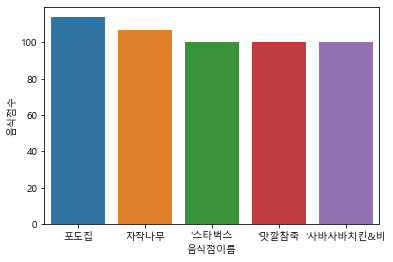

In [34]:
sns.barplot(data=df_1, x="음식점이름", y="음식점수") #seaborn 사용

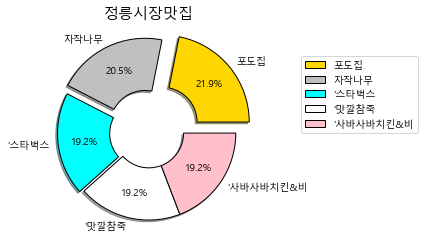

In [35]:
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'}
plt.pie(df_1['음식점수'], labels = df_1['음식점이름'], autopct = '%.1f%%', colors = ['gold', 'silver', 'cyan', 'white', 'pink'], explode = [0.2, 0.1, 0.05, 0, 0], shadow = True, wedgeprops = wedgeprops, pctdistance=0.7)
plt.title('정릉시장맛집', size = 15)
plt.legend(loc = (1.2, 0.5))
plt.show()

## 워드클라우딩

In [36]:
FONTPATH =  "NanumGothic.ttf"  

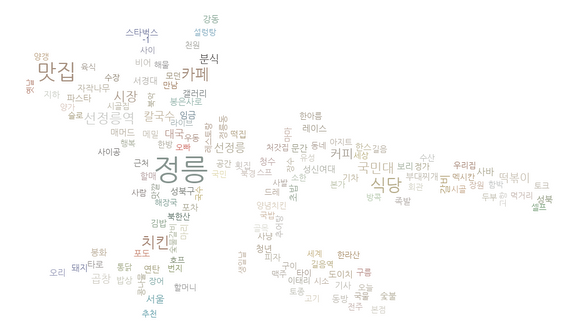

In [37]:
#워드클라우드로 나타내기
stopwords = set(STOPWORDS)    
img_mask = np.array(Image.open("Marketimage.jpg")) 
image_colors = ImageColorGenerator(img_mask)
stopwords = set(STOPWORDS)    

wordcloud = WordCloud(max_font_size = 50, max_words = 1000, \
                      background_color='white', stopwords=stopwords, \
                      random_state=10,mask=img_mask, \
                      color_func=image_colors, font_path = FONTPATH)
wc = wordcloud.generate_from_frequencies(data_kom)

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = "lanczos")
plt.axis("off")
plt.show()

## TF-IDF

#### 데이터에서 반복되는 패턴이 없어 TF-IDF 분석이 어려워 빈도출현이 잦은 음식점이름들로 임의의 리스트를 만들어줌

In [80]:
df['음식점이름'].head(6)

0          포도집
1         자작나무
2        '스타벅스
3        '맛깔참죽
4    '사바사바치킨&비
5        도이칠란드
Name: 음식점이름, dtype: object

In [196]:
import random

best_store_kookmin_1 = []
best_store_kookmin_2 = []
best_store_kookmin_3 = []
best_store_kookmin_4 = []
best_store_kookmin_5 = []

store_name = ['포도집', '자작나무', '스타벅스', '사바사바치킨', '도이칠란드']

for i in range(0,6):
    best_store_kookmin_1.append(random.choice(store_name))
for i in range(0,7):
    best_store_kookmin_2.append(random.choice(store_name))
for i in range(0,8):
    best_store_kookmin_3.append(random.choice(store_name))
for i in range(0,9):
    best_store_kookmin_4.append(random.choice(store_name))
for i in range(0,10):
    best_store_kookmin_5.append(random.choice(store_name))

In [197]:
best_store_kookmin_1 = " ".join(best_store_kookmin_1)
best_store_kookmin_2 = " ".join(best_store_kookmin_2)
best_store_kookmin_3 = " ".join(best_store_kookmin_3)
best_store_kookmin_4 = " ".join(best_store_kookmin_4)
best_store_kookmin_5 = " ".join(best_store_kookmin_5)

In [198]:
best_store_kookmin = [best_store_kookmin_1,best_store_kookmin_2,best_store_kookmin_3,best_store_kookmin_4,best_store_kookmin_5]

In [199]:
# 각 문서별 단어 빈도 계수

from collections import Counter 
word_counts = []
vocabulary = set()

for document in best_store_kookmin:
    words = document.split() 
    print(words)
    vocabulary.update(words) 
    print(vocabulary)
    word_count = Counter(words)
    print(word_count)
    word_counts.append(word_count) 
    print(word_counts)
    print()
print(vocabulary)
print()
word_counts

['사바사바치킨', '포도집', '자작나무', '포도집', '사바사바치킨', '도이칠란드']
{'자작나무', '포도집', '도이칠란드', '사바사바치킨'}
Counter({'사바사바치킨': 2, '포도집': 2, '자작나무': 1, '도이칠란드': 1})
[Counter({'사바사바치킨': 2, '포도집': 2, '자작나무': 1, '도이칠란드': 1})]

['사바사바치킨', '스타벅스', '스타벅스', '포도집', '포도집', '자작나무', '도이칠란드']
{'사바사바치킨', '스타벅스', '도이칠란드', '자작나무', '포도집'}
Counter({'스타벅스': 2, '포도집': 2, '사바사바치킨': 1, '자작나무': 1, '도이칠란드': 1})
[Counter({'사바사바치킨': 2, '포도집': 2, '자작나무': 1, '도이칠란드': 1}), Counter({'스타벅스': 2, '포도집': 2, '사바사바치킨': 1, '자작나무': 1, '도이칠란드': 1})]

['자작나무', '사바사바치킨', '도이칠란드', '도이칠란드', '사바사바치킨', '도이칠란드', '사바사바치킨', '사바사바치킨']
{'사바사바치킨', '스타벅스', '도이칠란드', '자작나무', '포도집'}
Counter({'사바사바치킨': 4, '도이칠란드': 3, '자작나무': 1})
[Counter({'사바사바치킨': 2, '포도집': 2, '자작나무': 1, '도이칠란드': 1}), Counter({'스타벅스': 2, '포도집': 2, '사바사바치킨': 1, '자작나무': 1, '도이칠란드': 1}), Counter({'사바사바치킨': 4, '도이칠란드': 3, '자작나무': 1})]

['포도집', '도이칠란드', '사바사바치킨', '스타벅스', '자작나무', '포도집', '자작나무', '자작나무', '사바사바치킨']
{'사바사바치킨', '스타벅스', '도이칠란드', '자작나무', '포도집'}
Counter({'자작나무': 3, '포도집': 2, '사바사바치킨': 2, '도

[Counter({'사바사바치킨': 2, '포도집': 2, '자작나무': 1, '도이칠란드': 1}),
 Counter({'사바사바치킨': 1, '스타벅스': 2, '포도집': 2, '자작나무': 1, '도이칠란드': 1}),
 Counter({'자작나무': 1, '사바사바치킨': 4, '도이칠란드': 3}),
 Counter({'포도집': 2, '도이칠란드': 1, '사바사바치킨': 2, '스타벅스': 1, '자작나무': 3}),
 Counter({'스타벅스': 2, '사바사바치킨': 1, '포도집': 3, '도이칠란드': 1, '자작나무': 3})]

In [200]:
# 희소벡터 표현
# 각 문서별 단어 빈도 계수

from collections import Counter 
word_counts = []
vocabulary = set()

for document in best_store_kookmin:
    words = document.split() 
    print(words)
    vocabulary.update(words) 
    print(vocabulary)
    word_count = Counter(words)
    print(word_count)
    word_counts.append(word_count) 
    print(word_counts)
    print()

# 희소벡터 표현
doc_dict_list = []

for word_count in word_counts:
    term_vec = {}
    for voca in vocabulary:
        term_vec[voca] = word_count.get(voca, 0)     
    doc_dict_list.append(term_vec)
        
doc_dict_list


['사바사바치킨', '포도집', '자작나무', '포도집', '사바사바치킨', '도이칠란드']
{'자작나무', '포도집', '도이칠란드', '사바사바치킨'}
Counter({'사바사바치킨': 2, '포도집': 2, '자작나무': 1, '도이칠란드': 1})
[Counter({'사바사바치킨': 2, '포도집': 2, '자작나무': 1, '도이칠란드': 1})]

['사바사바치킨', '스타벅스', '스타벅스', '포도집', '포도집', '자작나무', '도이칠란드']
{'사바사바치킨', '스타벅스', '도이칠란드', '자작나무', '포도집'}
Counter({'스타벅스': 2, '포도집': 2, '사바사바치킨': 1, '자작나무': 1, '도이칠란드': 1})
[Counter({'사바사바치킨': 2, '포도집': 2, '자작나무': 1, '도이칠란드': 1}), Counter({'스타벅스': 2, '포도집': 2, '사바사바치킨': 1, '자작나무': 1, '도이칠란드': 1})]

['자작나무', '사바사바치킨', '도이칠란드', '도이칠란드', '사바사바치킨', '도이칠란드', '사바사바치킨', '사바사바치킨']
{'사바사바치킨', '스타벅스', '도이칠란드', '자작나무', '포도집'}
Counter({'사바사바치킨': 4, '도이칠란드': 3, '자작나무': 1})
[Counter({'사바사바치킨': 2, '포도집': 2, '자작나무': 1, '도이칠란드': 1}), Counter({'스타벅스': 2, '포도집': 2, '사바사바치킨': 1, '자작나무': 1, '도이칠란드': 1}), Counter({'사바사바치킨': 4, '도이칠란드': 3, '자작나무': 1})]

['포도집', '도이칠란드', '사바사바치킨', '스타벅스', '자작나무', '포도집', '자작나무', '자작나무', '사바사바치킨']
{'사바사바치킨', '스타벅스', '도이칠란드', '자작나무', '포도집'}
Counter({'자작나무': 3, '포도집': 2, '사바사바치킨': 2, '도

[{'사바사바치킨': 2, '스타벅스': 0, '도이칠란드': 1, '자작나무': 1, '포도집': 2},
 {'사바사바치킨': 1, '스타벅스': 2, '도이칠란드': 1, '자작나무': 1, '포도집': 2},
 {'사바사바치킨': 4, '스타벅스': 0, '도이칠란드': 3, '자작나무': 1, '포도집': 0},
 {'사바사바치킨': 2, '스타벅스': 1, '도이칠란드': 1, '자작나무': 3, '포도집': 2},
 {'사바사바치킨': 1, '스타벅스': 2, '도이칠란드': 1, '자작나무': 3, '포도집': 3}]

In [201]:
# 전체 문서의 단어 빈도 계수

from collections import Counter

word_counts = Counter()

for document in best_store_kookmin:
    words = document.split()
    word_counts.update(words)

print(word_counts)

Counter({'사바사바치킨': 10, '포도집': 9, '자작나무': 9, '도이칠란드': 7, '스타벅스': 5})


In [202]:
# 문서/단어 행렬 생성 


import numpy as np
from collections import Counter

word_counts = []
vocabulary = set()

for document in best_store_kookmin:
    words = document.split()
    vocabulary.update(words)
    word_count = Counter(words)
    word_counts.append(word_count)
    
vocabulary = list(sorted(vocabulary)) 
    
doc_vec_list = []

for word_count in word_counts:
    term_vec = []
    for voca in vocabulary:
        term_freq = word_count.get(voca, 0)
        term_vec.append(term_freq)
    doc_vec_list.append(term_vec)

print(vocabulary)
print(doc_vec_list)

doc_term_mat = np.array(doc_vec_list)         # 리스트를 행렬로 변환 
print(doc_term_mat)

['도이칠란드', '사바사바치킨', '스타벅스', '자작나무', '포도집']
[[1, 2, 0, 1, 2], [1, 1, 2, 1, 2], [3, 4, 0, 1, 0], [1, 2, 1, 3, 2], [1, 1, 2, 3, 3]]
[[1 2 0 1 2]
 [1 1 2 1 2]
 [3 4 0 1 0]
 [1 2 1 3 2]
 [1 1 2 3 3]]


## scikit-learn 패키지 활용

CountVectorizer 활용
*    기본 문서/단어 행렬 생성
*   CountVectorizer는 행렬을 압축 형태(밀집 행렬: Dense Matrix)로 저장 

In [203]:
# 기본 문서/단어 행렬 생성 
from sklearn.feature_extraction.text import CountVectorizer                     


vectorizer = CountVectorizer(tokenizer=str.split)       

doc_term_mat = vectorizer.fit_transform(best_store_kookmin)

doc_term_mat_d = doc_term_mat.toarray()                 

vocabulary = vectorizer.vocabulary_

print(vocabulary)                                       
print(doc_term_mat)
print()

print(vectorizer.get_feature_names())
print(doc_term_mat_d)

{'사바사바치킨': 1, '포도집': 4, '자작나무': 3, '도이칠란드': 0, '스타벅스': 2}
  (0, 1)	2
  (0, 4)	2
  (0, 3)	1
  (0, 0)	1
  (1, 1)	1
  (1, 4)	2
  (1, 3)	1
  (1, 0)	1
  (1, 2)	2
  (2, 1)	4
  (2, 3)	1
  (2, 0)	3
  (3, 1)	2
  (3, 4)	2
  (3, 3)	3
  (3, 0)	1
  (3, 2)	1
  (4, 1)	1
  (4, 4)	3
  (4, 3)	3
  (4, 0)	1
  (4, 2)	2

['도이칠란드', '사바사바치킨', '스타벅스', '자작나무', '포도집']
[[1 2 0 1 2]
 [1 1 2 1 2]
 [3 4 0 1 0]
 [1 2 1 3 2]
 [1 1 2 3 3]]


In [204]:
vectorizer = CountVectorizer(tokenizer=str.split,max_features =3)     # 상위 빈도 3개 단어만 출력     
doc_term_mat = vectorizer.fit_transform(best_store_kookmin)
doc_term_mat_d = doc_term_mat.toarray()

print(vectorizer.get_feature_names())
print(doc_term_mat_d)

['사바사바치킨', '자작나무', '포도집']
[[2 1 2]
 [1 1 2]
 [4 1 0]
 [2 3 2]
 [1 3 3]]


In [205]:
# 단어의 출현 여부 출력(binary 옵션 설정)
vectorizer = CountVectorizer(tokenizer=str.split, binary = True)            # 빈도가 아닌 출현여부 출력
doc_term_mat = vectorizer.fit_transform(best_store_kookmin)
doc_term_mat_d = doc_term_mat.toarray()

print(vectorizer.get_feature_names())
print(doc_term_mat_d)

['도이칠란드', '사바사바치킨', '스타벅스', '자작나무', '포도집']
[[1 1 0 1 1]
 [1 1 1 1 1]
 [1 1 0 1 0]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [206]:
#단어 조합의 출현 빈도 출력(ngram_range 옵션 설정)
vectorizer = CountVectorizer(tokenizer=str.split, ngram_range = (1, 4))          # 분석 범위 설정. 1개 ~ 3개까지 분석
doc_term_mat = vectorizer.fit_transform(best_store_kookmin)
doc_term_mat_d = doc_term_mat.toarray()

print(vectorizer.get_feature_names())
print(doc_term_mat_d)

['도이칠란드', '도이칠란드 도이칠란드', '도이칠란드 도이칠란드 사바사바치킨', '도이칠란드 도이칠란드 사바사바치킨 도이칠란드', '도이칠란드 사바사바치킨', '도이칠란드 사바사바치킨 도이칠란드', '도이칠란드 사바사바치킨 도이칠란드 사바사바치킨', '도이칠란드 사바사바치킨 사바사바치킨', '도이칠란드 사바사바치킨 스타벅스', '도이칠란드 사바사바치킨 스타벅스 자작나무', '도이칠란드 포도집', '도이칠란드 포도집 자작나무', '도이칠란드 포도집 자작나무 자작나무', '사바사바치킨', '사바사바치킨 도이칠란드', '사바사바치킨 도이칠란드 도이칠란드', '사바사바치킨 도이칠란드 도이칠란드 사바사바치킨', '사바사바치킨 도이칠란드 사바사바치킨', '사바사바치킨 도이칠란드 사바사바치킨 사바사바치킨', '사바사바치킨 사바사바치킨', '사바사바치킨 스타벅스', '사바사바치킨 스타벅스 스타벅스', '사바사바치킨 스타벅스 스타벅스 포도집', '사바사바치킨 스타벅스 자작나무', '사바사바치킨 스타벅스 자작나무 포도집', '사바사바치킨 포도집', '사바사바치킨 포도집 도이칠란드', '사바사바치킨 포도집 도이칠란드 포도집', '사바사바치킨 포도집 자작나무', '사바사바치킨 포도집 자작나무 포도집', '스타벅스', '스타벅스 사바사바치킨', '스타벅스 사바사바치킨 포도집', '스타벅스 사바사바치킨 포도집 도이칠란드', '스타벅스 스타벅스', '스타벅스 스타벅스 포도집', '스타벅스 스타벅스 포도집 포도집', '스타벅스 자작나무', '스타벅스 자작나무 포도집', '스타벅스 자작나무 포도집 자작나무', '스타벅스 포도집', '스타벅스 포도집 포도집', '스타벅스 포도집 포도집 자작나무', '자작나무', '자작나무 도이칠란드', '자작나무 사바사바치킨', '자작나무 사바사바치킨 도이칠란드', '자작나무 사바사바치킨 도이칠란드 도이칠란드', '자작나무 자작나무', '자작나무 자작나무 사바사바치킨', '자작나무 자작나무 포도집', '자작나무 자작나무 포도집 스타벅스', '자작나무 포도

## TfidfVectorizer 활용

In [207]:
# TF-IDF 기반 문서/단어 행렬 생성
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=str.split, norm = None)             # 정규화하지 않음. norm 생략시 L2 정규화
doc_term_mat = vectorizer.fit_transform(best_store_kookmin)
doc_term_mat_d = doc_term_mat.toarray()

print(vectorizer.get_feature_names())
print(doc_term_mat_d)

['도이칠란드', '사바사바치킨', '스타벅스', '자작나무', '포도집']
[[1.         2.         0.         1.         2.36464311]
 [1.         1.         2.81093022 1.         2.36464311]
 [3.         4.         0.         1.         0.        ]
 [1.         2.         1.40546511 3.         2.36464311]
 [1.         1.         2.81093022 3.         3.54696467]]


In [208]:
# 단순 TF기반 문서/단어 행렬 생성
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=str.split, norm = None, use_idf = False)    # IDF를 사용하지 않음. 즉 TF만 사용
doc_term_mat = vectorizer.fit_transform(best_store_kookmin)                               #    use_idf 생략시 TF-IDF 사용
doc_term_mat_d = doc_term_mat.toarray()

print(vectorizer.get_feature_names())
print(doc_term_mat_d)

['도이칠란드', '사바사바치킨', '스타벅스', '자작나무', '포도집']
[[1. 2. 0. 1. 2.]
 [1. 1. 2. 1. 2.]
 [3. 4. 0. 1. 0.]
 [1. 2. 1. 3. 2.]
 [1. 1. 2. 3. 3.]]


In [209]:
# 정규화 기준의 변경, norm = "l1", norm = "l2" (default), norm = None
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=str.split, norm = "l2")      #norm = "l2"  를 생략해도 동일
doc_term_mat = vectorizer.fit_transform(best_store_kookmin)
doc_term_mat_d = doc_term_mat.toarray()

print(vectorizer.get_feature_names())
print(doc_term_mat_d)

['도이칠란드', '사바사바치킨', '스타벅스', '자작나무', '포도집']
[[0.29371727 0.58743454 0.         0.29371727 0.69453652]
 [0.24623622 0.24623622 0.69215284 0.24623622 0.58226079]
 [0.58834841 0.78446454 0.         0.19611614 0.        ]
 [0.21533095 0.43066189 0.30264013 0.64599284 0.50918084]
 [0.17822428 0.17822428 0.50097601 0.53467283 0.63215522]]


In [211]:
# 정규화 기준의 변경, norm = "l1", norm = "l2" (default), norm = None
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(tokenizer=str.split,norm = "l2")      #norm = "l2"  를 생략해도 동일
doc_term_mat = vectorizer.fit_transform(store_list)
doc_term_mat_d = doc_term_mat.toarray()

print(vectorizer.get_feature_names())
print(doc_term_mat_d)

['&', '(look', '(your', '(길음뉴타운점)', '(더)두레식당', '(성신여대)', '(월곡점)', '(정)푸드', '(주)버거파크', '(주)세진케이터링', '(주)한맛푸드', '(포유)', '(포크온포크)', '0410', '1/2)', '10', '10)', '100년', '100년설렁탕', '101', '102호프', '104', '12길', '1943', '1973', '1984', '1st', '1인용', '1포차', '1호점', '237플랫폼카페', '256', '25시', '260', '26번지', '2호점', '3', '33떡볶이', '38포차2', '3月달', '4939(사구삼구)', '500g', '500소갈비살', '56st', '58.4', '599', '59쌀피자', '59쌀피자(동덕여대점)', '60계치킨', '60계치킨(종암점)', '666버거', '6층카페', '7080', '72420', '8.15', '815(팔일오)', '88', '89번가', '89번가돈암점', '9', '90℃)', '95&96(감성포차)', '9bar', 'a', 'a)', 'abound(어바운드)', 'adult(유즈리스어덜트)', 'after', 'alley)', 'an)', 'another', 'appetit(보보', 'aquadays', 'artist(호텔디아티스트성신여대점)', 'at)', 'atthe', 'ave[아베이]', 'b', 'b1(비원)', 'baffo', 'bakery(앳더베이커리)', 'bambino)', 'bangkok', 'bar', 'bar(페인킬러바)', 'bbq', 'bbq)', 'bbq강북스타길음점', 'bbq래미안길음센터피스점', 'bbq석관돌곶이점', 'beanology(빈올로지)', 'beans', 'beer', 'bhc', 'bhc치킨(비에이치씨치킨)', 'bh해장국', 'bistro', 'bistro<비스트로>2.25', 'bobo', 'bon', 'bong차이나', 'box(프라이박스)',

In [212]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(tokenizer=str.split,norm = "l2",max_features =10)      #norm = "l2"  를 생략해도 동일
doc_term_mat = vectorizer.fit_transform(store_list)
doc_term_mat_d = doc_term_mat.toarray()

print(vectorizer.get_feature_names())
print(doc_term_mat_d)

['고대점', '고려대점', '돈암점', '떡볶이', '성북점', '성신여대점', '안암점', '월곡점', '정릉점', '종암점']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [213]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(norm = "l2",max_features =10)      #norm = "l2"  를 생략해도 동일
doc_term_mat = vectorizer.fit_transform(store_list)
doc_term_mat_d = doc_term_mat.toarray()

print(vectorizer.get_feature_names())
print(doc_term_mat_d)

['cafe', 'coffee', 'the', '석관점', '성북점', '성신여대점', '안암점', '월곡점', '정릉점', '종암점']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 결론 : 
#### 맛집추천사이트 및 VIEW 검색 블로그 리뷰 크롤링을 한 데이터를 빈도분석하여서 근처 맛집을 분석했다. 
#### 실생활에 접목시키고 싶어서 빈도분석을 하였고 실제로 도이칠란드, 청년밥상 문간, 사이공, 처갓집양념치킨, 먹거리곱창 등등
#### 자취를 하면서 한번식 사먹는 음식이 출현하였고 그 외 맛집도 추가적으로 알 수 있었다.

In [224]:
df.head(22)

,음식점수,음식점이름
0,114,포도집
1,107,자작나무
2,100,'스타벅스
3,100,'맛깔참죽
4,100,'사바사바치킨&비
5,68,도이칠란드
6,56,유성분식
7,56,장수식당
8,54,꿀꿀이생일날
9,54,청년밥상문간
